<h2 style='color:brown' align='center'>Small Image Classification Using Convolutional Neural Network (CNN)</h2>

### In this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes as shown below. We will use CNN for classification.

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes (e.g. airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck) with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-seleted images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

Here are the classes in the dataset, as well as 10 random images from each:

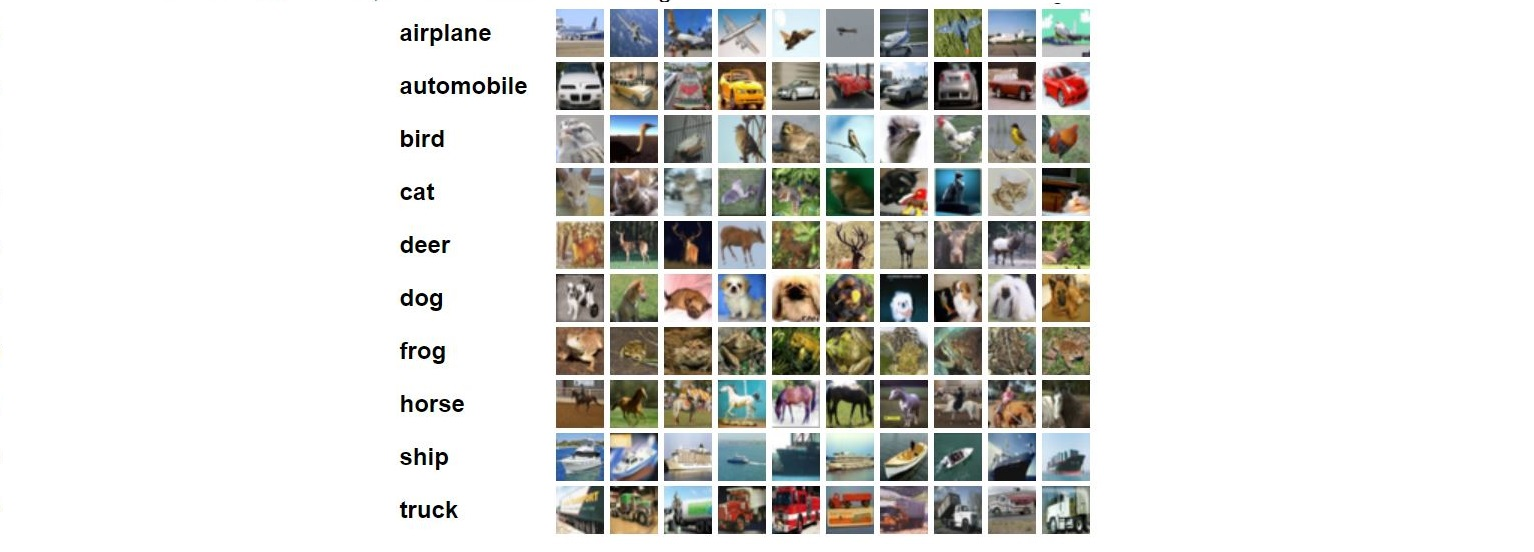

The classes are completely mutually exclusive. There is no overlap between automobiles and trucks. "Automobile" includes sedans, SUVs, things of that sort. "Truck" includes only big trucks. Neigther includes pickup trucks.

More details and download link for this dataset is here - https://www.tensorflow.org/datasets/catalog/cifar10

In [1]:
# run 'pip install tensorflow' at anaconda prompt to install it for the first time
# to install tensorflow successfully you should have either one of the python or anaconda installtions, not both.
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

<h4 style="color:purple">Load the dataset</h4>

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape    # 50000 samples, each of size 32x32 and each for 3 RGB channels 

(50000, 32, 32, 3)

In [3]:
X_test.shape    # 10000 samples, each of size 32x32 and each for 3 RGB channels 

(10000, 32, 32, 3)

Here we see there are 50000 training images and 1000 test images

In [4]:
y_train.shape    # it is having 50000 samples and 2D array

(50000, 1)

In [5]:
print (X_train[0].shape, len(X_train[0]))
X_train[0]    # it gives a 3D array

(32, 32, 3) 32


array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

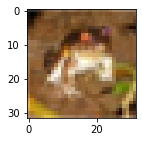

In [6]:
# let us now plot it
plt.figure(figsize=(15, 2))
plt.imshow(X_train[0])    # this is a frog

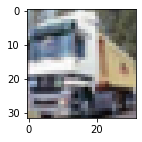

In [7]:
# let us now plot it
plt.figure(figsize=(15, 2))
plt.imshow(X_train[1])    # this is for truck

In [8]:
print (y_train.shape)    # it is having 50000 samples and 1D array
y_train[:5]

(50000, 1)


array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [9]:
# so as the first dimension 5000 we want to keep it same so we shall write -1 in that place
y_train = y_train.reshape(-1,)    # converting y_train 2D array to 1D array

y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [10]:
# so as the first dimension 5000 we want to keep it same so we shall write -1 in that place
y_test = y_test.reshape(-1,)    # converting y_test 2D array to 1D array
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [11]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
print (classes[5], classes[9])

dog truck


Let's plot some images to see what they are 

In [12]:
# let us define a function which will take X, y and index to print the image
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])   # printing the label of the image

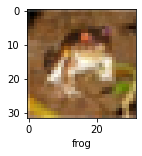

In [13]:
plot_sample(X_train, y_train, 0)

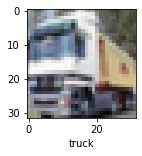

In [14]:
plot_sample(X_train, y_train, 1)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0 to 1 range, we need to divide it by 255

<h4 style="color:purple">Normalizing the training and test data</h4>

In [15]:
# normalizing the training and test data. Scaling will improve the efficiency of a model
# after scaling values will range from 0 to 1
X_train = X_train / 255.0
X_test = X_test / 255.0

In [16]:
X_train[:5]    # printing the normalized X_train first 5 index values

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [17]:
X_test[:5]     # printing the normalized X_test first 5 index values

array([[[[0.61960784, 0.43921569, 0.19215686],
         [0.62352941, 0.43529412, 0.18431373],
         [0.64705882, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254902, 0.14117647],
         [0.49411765, 0.35686275, 0.14117647],
         [0.45490196, 0.33333333, 0.12941176]],

        [[0.59607843, 0.43921569, 0.2       ],
         [0.59215686, 0.43137255, 0.15686275],
         [0.62352941, 0.44705882, 0.17647059],
         ...,
         [0.53333333, 0.37254902, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509804, 0.13333333]],

        [[0.59215686, 0.43137255, 0.18431373],
         [0.59215686, 0.42745098, 0.12941176],
         [0.61960784, 0.43529412, 0.14117647],
         ...,
         [0.54509804, 0.38431373, 0.13333333],
         [0.50980392, 0.37254902, 0.13333333],
         [0.47058824, 0.34901961, 0.12941176]],

        ...,

        [[0.26666667, 0.48627451, 0.69411765],
         [0.16470588, 0.39215686, 0.58039216]

<h4 style="color:purple">Build a simple Artificial Neural Network (ANN) for image classification</h4>

In [18]:
# let us check the performance of ANN in this classification problem at first, then we shall go for CNN implementation

In [19]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),  # flatten the first layer 32x32x3
        layers.Dense(3000, activation='relu'),  # dense hidden layer-1 with 3000 neurons
        layers.Dense(1000, activation='relu'),  # dense hidden layer-2 with 1000 neurons
        layers.Dense(10, activation='softmax')  # dense output layer with 10 neurons for 10 classes  
    ])

ann.compile(optimizer='SGD', # Stochastic gradient descent is an iterative method for optimizing 
                             # an objective function with suitable smoothness properties.
              loss='sparse_categorical_crossentropy',    # Computes the crossentropy loss between 
                                                         # the labels and predictions
              metrics=['accuracy'])   # Calculates how often predictions equal labels

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 61s 38ms/step - loss: 1.8134 - accuracy: 0.3542
Epoch 2/5
1563/1563 [==============================] - 61s 39ms/step - loss: 1.6245 - accuracy: 0.4268
Epoch 3/5
1563/1563 [==============================] - 85s 55ms/step - loss: 1.5419 - accuracy: 0.4561
Epoch 4/5
1563/1563 [==============================] - 87s 55ms/step - loss: 1.4819 - accuracy: 0.4771
Epoch 5/5
1563/1563 [==============================] - 70s 45ms/step - loss: 1.4329 - accuracy: 0.4954


The difference between categorical_crossentropy and sparse_categorical_crossentropy has been shown below. When the output is hot encoded e.g. y = [0 0 0 0 0 0 0 0 0 1 0] we use categorical_crossentropy and when the output is directly a value y = 8 then we use sparse_categorical_crossentropy.

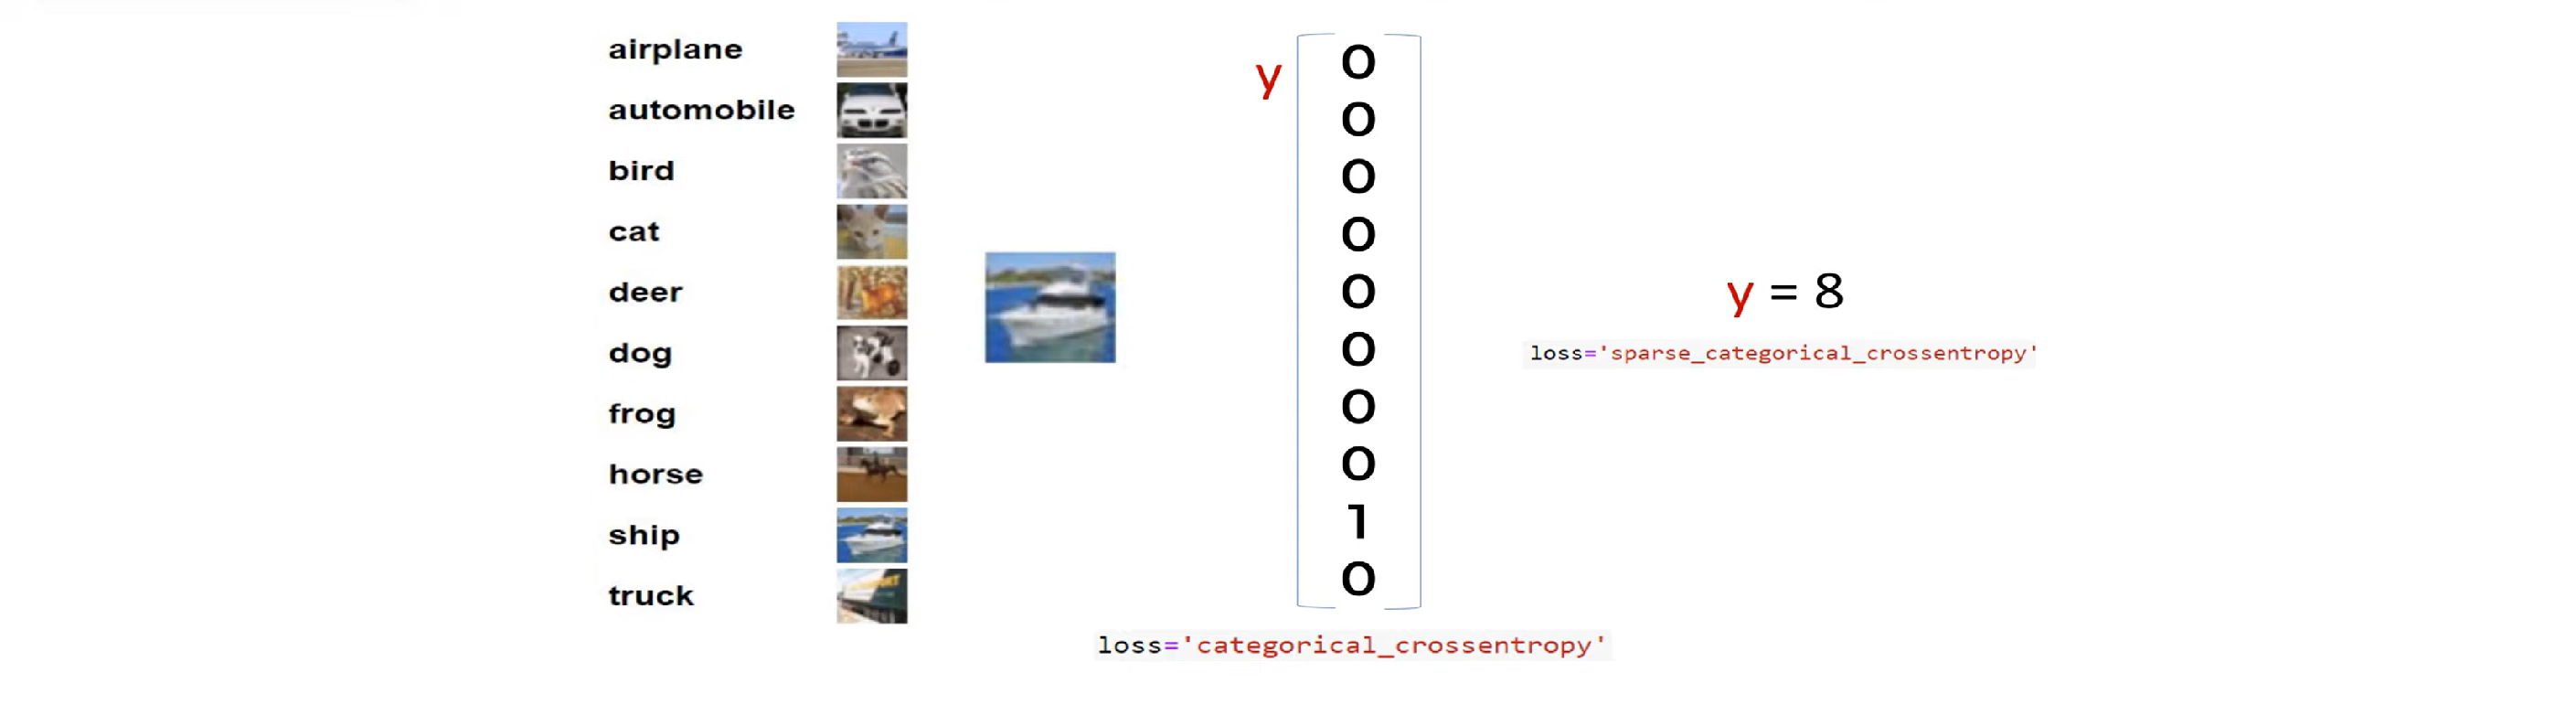

In [20]:
ann.evaluate(X_test, y_test)    # so the performance of ANN in this classification problem is very poor

313/313 [==============================] - 4s 11ms/step - loss: 1.4687 - accuracy: 0.4686


[1.4687241315841675, 0.46860000491142273]

**You can see that at the end of 5 epochs, accuracy is at around 46%**

In [21]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))
# so here the accuracy is 47%

Classification Report: 
               precision    recall  f1-score   support

           0       0.54      0.53      0.54      1000
           1       0.71      0.43      0.54      1000
           2       0.27      0.61      0.37      1000
           3       0.38      0.33      0.35      1000
           4       0.55      0.20      0.29      1000
           5       0.53      0.21      0.31      1000
           6       0.48      0.60      0.53      1000
           7       0.68      0.42      0.52      1000
           8       0.53      0.73      0.61      1000
           9       0.50      0.63      0.56      1000

    accuracy                           0.47     10000
   macro avg       0.52      0.47      0.46     10000
weighted avg       0.52      0.47      0.46     10000



<h4 style="color:purple">Now let us build a Convolutional Neural Network (CNN) to train our images</h4>

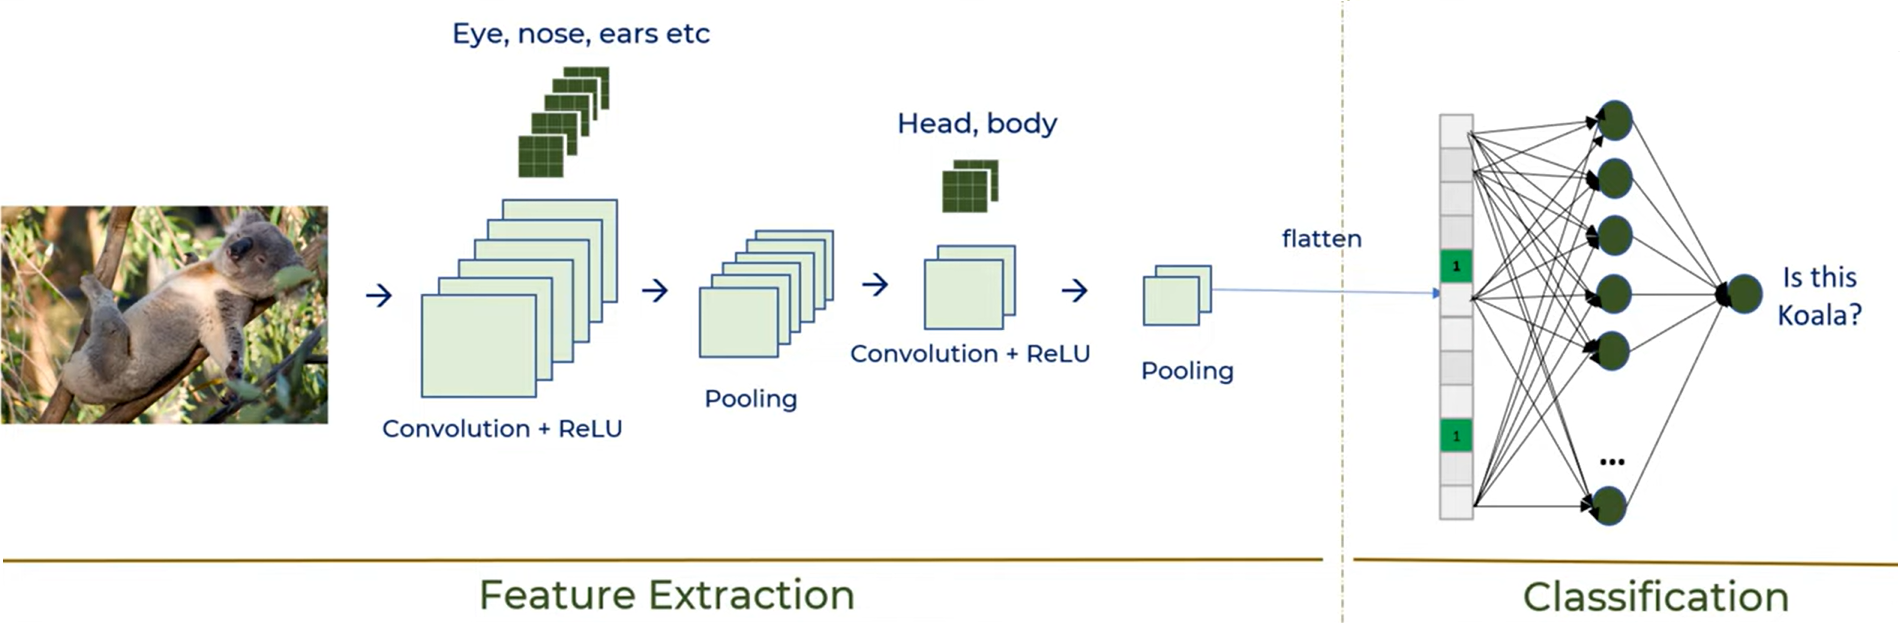

In [22]:
cnn = models.Sequential([
    # here we are mentioning the filter contents but just mentioning there will be 32 filters to
    # detect 32 edges in the image and filter size is 3x3
    # so following is the convolution layer details
    
    # CNN first convolution and pooling layer
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    # so following is the pooling layer details with max pooling
    layers.MaxPooling2D((2, 2)),
    
    # CNN second convolution and pooling layer
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # dense network
    layers.Flatten(),   # we need not to mention the shape of this layer, network will decide automatically
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # in softmax sum of all probabilities of all classes will be 1
])

In [23]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Computes the crossentropy loss between 
                                                       # the labels and predictions
              metrics=['accuracy'])                    # Calculates how often predictions equal labels

In [24]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 26s 16ms/step - loss: 1.4656 - accuracy: 0.4703
Epoch 2/10
1563/1563 [==============================] - 26s 16ms/step - loss: 1.1349 - accuracy: 0.6027
Epoch 3/10
1563/1563 [==============================] - 26s 17ms/step - loss: 1.0014 - accuracy: 0.6508
Epoch 4/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.9221 - accuracy: 0.6820
Epoch 5/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.8543 - accuracy: 0.7040
Epoch 6/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.7965 - accuracy: 0.7226
Epoch 7/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.7495 - accuracy: 0.7399
Epoch 8/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.7043 - accuracy: 0.7555
Epoch 9/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.6647 - accuracy: 0.7713
Epoch 10/10
1563/1563 [==============================] - 29s 19m

**With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features**

In [25]:
cnn.evaluate(X_test,y_test)   # obtained 70% accuracy

313/313 [==============================] - 3s 10ms/step - loss: 0.9516 - accuracy: 0.6955


[0.9515501260757446, 0.6955000162124634]

In [26]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[4.7425916e-03, 6.7286394e-03, 6.2389174e-03, 7.9559475e-01,
        1.3061023e-03, 1.1620189e-01, 4.6345372e-02, 5.1987951e-04,
        2.1226170e-02, 1.0955783e-03],
       [1.4480059e-02, 6.9877201e-01, 2.5937468e-05, 2.6278997e-07,
        1.9548841e-06, 5.6038073e-07, 1.2051729e-07, 8.5419668e-07,
        2.8506947e-01, 1.6487646e-03],
       [8.9003807e-03, 6.6577041e-01, 2.5988594e-04, 4.2064199e-03,
        5.4866006e-04, 6.3696626e-04, 6.1984255e-04, 3.1429276e-04,
        7.7205867e-02, 2.4153729e-01],
       [8.1437421e-01, 1.3460480e-01, 5.1880493e-03, 4.0821782e-03,
        2.5881904e-03, 3.5786616e-05, 3.0320711e-04, 1.9828463e-04,
        3.8263682e-02, 3.6164888e-04],
       [6.0574612e-06, 1.7663070e-04, 2.5639797e-02, 3.4106817e-02,
        1.2270228e-01, 1.2898619e-03, 8.1519252e-01, 1.5246096e-05,
        8.6916384e-04, 1.7276610e-06]], dtype=float32)

In [27]:
y_classes = [np.argmax(element) for element in y_pred]    # using list comprehension
y_classes[:5]

[3, 1, 1, 0, 6]

In [28]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

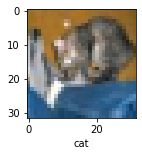

In [29]:
plot_sample(X_test, y_test, 0)

In [30]:
classes[y_classes[0]]    # so there is a wrong prediction

'cat'

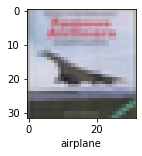

In [31]:
plot_sample(X_test, y_test,3)

In [32]:
classes[y_classes[3]]    # so there is a correct prediction

'airplane'

In [33]:
# generating the classification report
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.79      0.72      1000
           1       0.75      0.84      0.80      1000
           2       0.66      0.50      0.57      1000
           3       0.60      0.39      0.47      1000
           4       0.64      0.68      0.66      1000
           5       0.61      0.64      0.63      1000
           6       0.73      0.82      0.77      1000
           7       0.67      0.81      0.73      1000
           8       0.91      0.65      0.76      1000
           9       0.74      0.82      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.69     10000
weighted avg       0.70      0.70      0.69     10000



So CNN is showing better result compared with ANN. Also the computational complexity is also less due to the present of max pooling techniques.